<a href="https://colab.research.google.com/github/vinodvicki/NETFLIX-MOVIE-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIE_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME** **:** **NETFLIX MOVIE AND TV SHOWS CLUSTERING**

# **PROBLEM STATEMENT** 
**NETFLIX PROBLEM STATEMENT**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is

collected from Flixable which is a third-party Netflix search engine. In 2018, they released an

interesting report which shows that the number of IV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset


# ***Let's Begin !***

### **Import Libraries**

In [1]:
import pandas as pd 
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

import warnings 
warnings.filterwarnings('ignore')

## **1. Dataset loading & overview**

In [2]:
#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
# importing dataset 
Dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets /netflix movie and tv shows data/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [23]:
# Dataset first
Dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [24]:
#dataset last
Dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [25]:
# dataset rows & columns
Dataset.shape

(7787, 12)

In [26]:
# dataset info
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [27]:
# Dataset Duplicates Value Count()
len(Dataset[Dataset.duplicated()])

0

In [28]:
# missing values/Null values
Dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [29]:
#total null values
Dataset.isnull().sum()
     

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

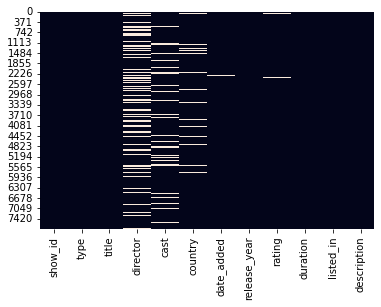

In [30]:
#visualizing the missing values by plotting Heatmap
sns.heatmap(Dataset.isnull(),cbar= False)

#### **knowing About Our Dataset Till Now**

However, based on the previous conversation, the information provided was about a dataset consisting of TV shows and movies available on Netflix as of 2019, collected from a third-party Netflix search engine called Flixable. It was also mentioned that the number of TV shows on Netflix has nearly tripled since 2010, while the number of movies has decreased by more than 2,000 titles.

The above dataset has 7787 rows & 12 columns.there are null values and no duplicate values in dataset

## **2. UNDERSTANDING VARIABLES**

In [31]:
#dataset columns
Dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [32]:
#dataset describe 
Dataset.describe(include= 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### vairable description


* **Show Id   :** Unique id for every movie / tv show

* **Type      :** Identfier - A movie or tv show

* **Title     :** Tittle of the movie/show

* **Director  :** Director of the show

* **Cast      :** Actors involved

* **Country   :** Country of production 

* **Date added :** Date it was added on Netflix

* **Release year  :** Actual release year of the show

* **Rating     :** Tv rating of the show 

* **Duration    :** Total duration in minutes or number of seasons

* **Listed in    :** Genre

* **Description  :** The summary description



In [33]:
### checking Unique Values for each Vairable 
for i in Dataset.columns.tolist():
  print("no of unique values in ", i ,"is",Dataset[i].nunique(),".")

no of unique values in  show_id is 7787 .
no of unique values in  type is 2 .
no of unique values in  title is 7787 .
no of unique values in  director is 4049 .
no of unique values in  cast is 6831 .
no of unique values in  country is 681 .
no of unique values in  date_added is 1565 .
no of unique values in  release_year is 73 .
no of unique values in  rating is 14 .
no of unique values in  duration is 216 .
no of unique values in  listed_in is 492 .
no of unique values in  description is 7769 .


## **3. Data Wrangling**

In [36]:
# Create a copy of the current dataset and assigning to df
df  = Dataset.copy()
df.shape

(7787, 12)

* There are some missing values in cast ,director, country  are replaced with unknown 
* 10 records of missing values of date_added are dropped
* The missing values in rating can be imputed with mode 

In [37]:
# handling missing values 
# missing values in cast ,director, country are replaced with unknown
df[['cast','director','country']] = df[['cast','director','country']].fillna('Unknown')

# imputing null value in rating column with mode
df[['rating']] = df[['rating']].fillna(df['rating'].mode()[0])

#droping null value in date_added 
df.dropna(axis=0 , inplace = True )

In [38]:
df.shape

(7777, 12)

In [39]:
# listed top countrys
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64